In [ ]:
!pip uninstall tensorflow
!pip uninstall keras

In [ ]:
!pip install tensorflow-gpu
!pip install keras

# Exercise: Experiment With Activation, Loss, Optimizers, and Regularization​
## The Exercise
​
This exercise is meant to help you:
​
* Use several different activation functions.
* Use several different loss functions.
* Use several different optimizers.
* Use dropout layers.
* Use early stopping.
* Evaluate the impact of the above on network performance.

This exercise is deceptively simple in its description: build at least two neural networks that achieve 97% or better validation accuracy on the MNIST dataset without using convolutional layers. Once you have (at least) two such networks, evaluate their performance on the test data and compare the results.


### Importing Required Libraries

In [25]:
from matplotlib import pyplot as plt 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

### The MNIST Dataset

In [26]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
print(train_images.shape, test_images.shape) #dimensions of data set

(60000, 28, 28) (10000, 28, 28)


In [28]:
train_data = train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
print(train_data.shape) #reshaping
test_data = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
print(test_data.shape)  #reshaping

(60000, 784)
(10000, 784)


In [29]:
mnist_num_classes = 10 #10 labels of data 
mnist_image_size = train_images.shape[1]*train_images.shape[2] #size = 28*28 = 784

In [30]:
train_labels = to_categorical(train_labels,mnist_num_classes) #turning labels into arrays
test_labels = to_categorical(test_labels,mnist_num_classes)

In [31]:
def plot_training_history(history, model):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

### Question

Start by forming a hypothesis about network architecture, specifically:
​
* How many layers, and how many nodes per layer should I start with?
  * Where should I apply dropout layers, and what percent dropout should I use in those layers?
  * Which activation function should I use on these layers?
* Which loss function should I use?
* Which optimizer should I use?
* Should I enable early stopping?
  * What parameters should I use related to early stopping?
  
​
Once you've made these decisions, write the code to build and train the model. Once you've trained the model and seen its validation scores, make a change to some aspect of your network (seriously consider making just one change at a time), and re-evaluate. With each change, make a note of the change and document how that change impacted performance—being explicit and documenting these impacts is not just a good scientific practice, it will help you learn and build an intuition for how changes might impact results.
​
Be careful not to over-generalize your findings, though. There are complex interactions between datasets, network architectures, different optimizers, and so on. What is true in one situation might be a generalizable truth, but it might be specific to the current situation as well.

### Outline

Here, we list the parameters with variations of which we shall use to build our various models

* Activation Functions: relu, sigmoid, tanh, elu, selu

* Dropout Rates: 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8

* Optimizer Functions: adam, sgd, nadam, adadelta, rmsprop

* Loss Functions: categorical_crossentropy, binary_crossentropy

* Network Architecture: 3 layer, 5 layer


### 3 Layer Network

Consider the 3 layer network architecture as follows

In [32]:
def get_model_3_layered(activation, dropout_rate):
  model = Sequential()
  model.add(Dense(units = 512, activation = activation, input_shape = (mnist_image_size,)))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(units = 256, activation = activation))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(units = 512, activation = activation))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(units = mnist_num_classes, activation = activation))
  return model

We shall initially consider the variations of parameters in the 3 layer network architecture. The variations corresponding to a particular parameter shall be consider with respect to levels. We shall eliminate a few variations of the considered paarmeter at each level to obtain the optimal model at the end. Note that few of the eliminations are based on convinince. I shall explain my actions as we progress. The parameter levels are as follows:

* Level 1 - Activation Functions
* Level 2 - Optimizer Functions
* Level 3 - Dropout Rates
* Level 4 - Losses
* Level 5 - Early Stopping

#### Level 1 - Variations in Activation Functions
Here we consider the variation of different activation functions on our 3 layer model keeping the other parameters fixed. We take nadam as our optimizer and categorical crossentropy as our loss function. These are considered as without loss of generality as they are the most efficient and most generally used and are thus chosen in order to avoid biases when we vary these respective parameters at subsequent levels. We conisder the variations in our dropout rate and application of early stopping at a later level as we believe it will contribute roughly to an increase the efficiency of our large network. We thus take dropout to be 0 and do not apply stopping potential for now.

Activation: relu  | Optimizer: nadam  | Drop out: 0.0  | Loss: categorical_crossentropy


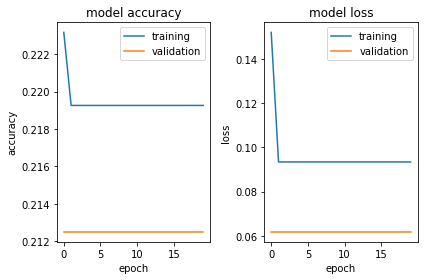

313/313 [==============================] - 1s 2ms/step - loss: 0.0580 - accuracy: 0.2212
Test loss: 0.058
Test accuracy: 0.221
Activation: sigmoid  | Optimizer: nadam  | Drop out: 0.0  | Loss: categorical_crossentropy


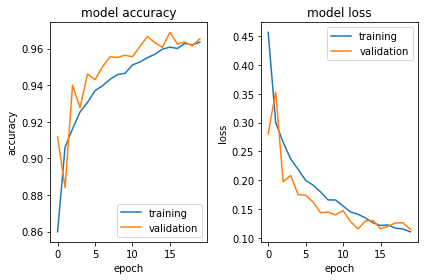

313/313 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9600
Test loss: 0.123
Test accuracy: 0.96
Activation: tanh  | Optimizer: nadam  | Drop out: 0.0  | Loss: categorical_crossentropy


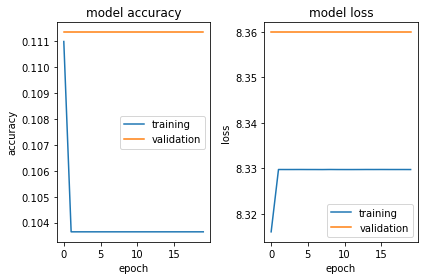

313/313 [==============================] - 1s 2ms/step - loss: 8.3572 - accuracy: 0.1028
Test loss: 8.36
Test accuracy: 0.103
Activation: elu  | Optimizer: nadam  | Drop out: 0.0  | Loss: categorical_crossentropy


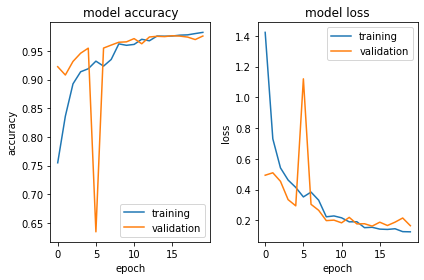

313/313 [==============================] - 1s 2ms/step - loss: 0.1783 - accuracy: 0.9764
Test loss: 0.178
Test accuracy: 0.976
Activation: selu  | Optimizer: nadam  | Drop out: 0.0  | Loss: categorical_crossentropy


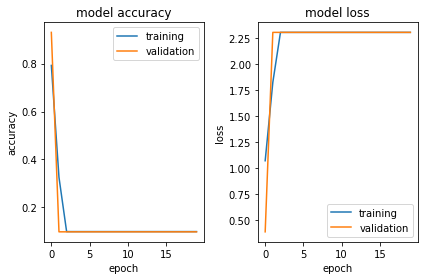

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.0980
Test loss: 2.3
Test accuracy: 0.098


In [34]:
epochs = 20
batch_size = 32
validation_split = 0.1

activations = ['relu','sigmoid','tanh','elu','selu']
optimizers = ['nadam']
dropout_rates = [.0]
losses = ['categorical_crossentropy']

for activation in activations:
  for dropout_rate in dropout_rates:
    for optimizer in optimizers:
      for loss in losses:
        model_1 = get_model_3_layered(activation, dropout_rate)
        model_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        print("Activation:", activation, " | Optimizer:", optimizer, " | Drop out:", dropout_rate, " | Loss:", loss)
        history = model_1.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
        plot_training_history(history, model_1)

#### Level 1 - Observations



From the above data we observe sigmoid and selu to have very good accuracies! elu is considerable. But tanh and Relu on the other hand yeild very poor results. The rough accuracies are as follows:

* relu = 22%+
* sigmoid = 96%+
* tanh = 10%+
* elu = 97%+
* selu = 98%+

We have thus found two networks that give more than 97% accuracy already!


#### Level 2 - Variations in Optimizers
We now consider the variation of the optimizers as stated initially and measure it's accuracy against elu, sigmoid and selu activation functions at this level. The remaining parameters remain unchanged due to the same reason as that given in case of level 1. We omit nadam here as we already calculated it's values in Level 1.


Activation: sigmoid  | Optimizer: adam  | Drop out: 0.0  | Loss: categorical_crossentropy


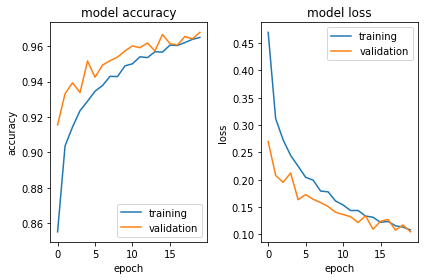

313/313 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9603
Test loss: 0.129
Test accuracy: 0.96
Activation: sigmoid  | Optimizer: sgd  | Drop out: 0.0  | Loss: categorical_crossentropy


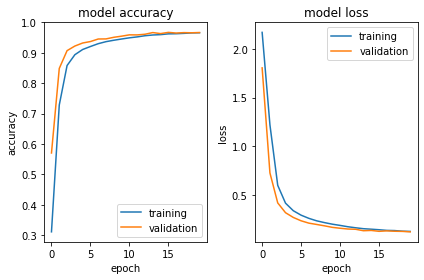

313/313 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9605
Test loss: 0.136
Test accuracy: 0.961
Activation: sigmoid  | Optimizer: adadelta  | Drop out: 0.0  | Loss: categorical_crossentropy


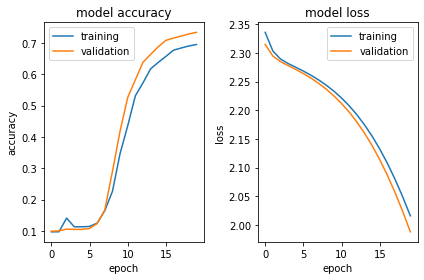

313/313 [==============================] - 1s 2ms/step - loss: 1.9926 - accuracy: 0.7070
Test loss: 1.99
Test accuracy: 0.707
Activation: elu  | Optimizer: adam  | Drop out: 0.0  | Loss: categorical_crossentropy


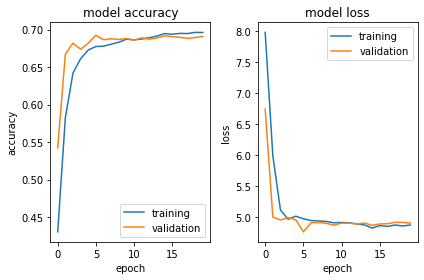

313/313 [==============================] - 1s 2ms/step - loss: 4.9416 - accuracy: 0.6874
Test loss: 4.94
Test accuracy: 0.687
Activation: elu  | Optimizer: sgd  | Drop out: 0.0  | Loss: categorical_crossentropy


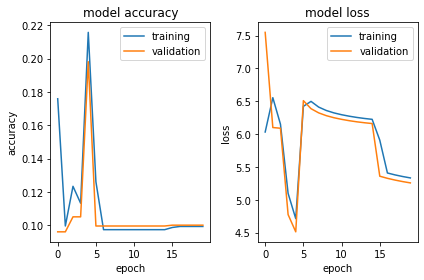

313/313 [==============================] - 1s 2ms/step - loss: 5.2595 - accuracy: 0.1032
Test loss: 5.26
Test accuracy: 0.103
Activation: elu  | Optimizer: adadelta  | Drop out: 0.0  | Loss: categorical_crossentropy


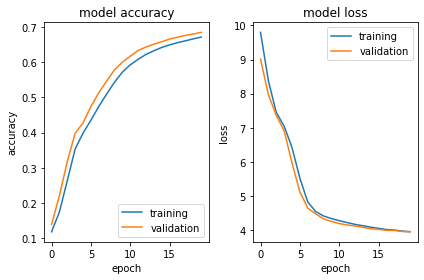

313/313 [==============================] - 1s 2ms/step - loss: 3.8715 - accuracy: 0.6841
Test loss: 3.87
Test accuracy: 0.684
Activation: selu  | Optimizer: adam  | Drop out: 0.0  | Loss: categorical_crossentropy


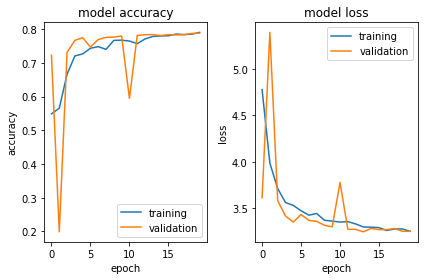

313/313 [==============================] - 1s 2ms/step - loss: 3.2758 - accuracy: 0.7879
Test loss: 3.28
Test accuracy: 0.788
Activation: selu  | Optimizer: sgd  | Drop out: 0.0  | Loss: categorical_crossentropy


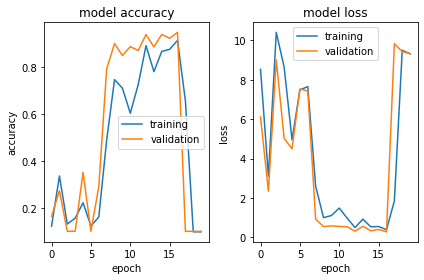

313/313 [==============================] - 1s 2ms/step - loss: 9.3064 - accuracy: 0.0974
Test loss: 9.31
Test accuracy: 0.0974
Activation: selu  | Optimizer: adadelta  | Drop out: 0.0  | Loss: categorical_crossentropy


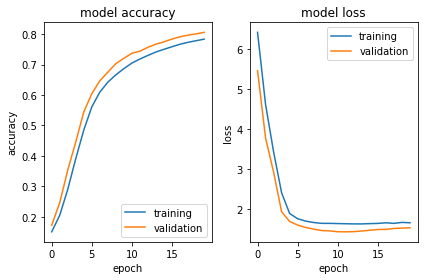

313/313 [==============================] - 1s 2ms/step - loss: 1.6568 - accuracy: 0.7932
Test loss: 1.66
Test accuracy: 0.793


In [35]:
epochs = 20
batch_size = 32
validation_split = 0.1

activations = ['sigmoid','elu','selu']
optimizers = ['adam','sgd','adadelta']
dropout_rates = [.0]
losses = ['categorical_crossentropy']

for activation in activations:
  for dropout_rate in dropout_rates:
    for optimizer in optimizers:
      for loss in losses:
        model_2 = get_model_3_layered(activation, dropout_rate)
        model_2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        print("Activation:", activation, " | Optimizer:", optimizer, " | Drop out:", dropout_rate, " | Loss:", loss)
        history = model_2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
        plot_training_history(history, model_2)

#### Level 2 - Observations

The rough accuracies for optimizers with respect to particular activation functions can be summarized as follows:

* Optimizer Function = adam
  * sigmoid = 96%+
  * elu = 68%+
  * selu = 78%+
* Optimizer Function = sgd
  * sigmoid = 96%+
  * elu = 10%+
  * selu = 9%+
* Optimizer Function = adadelta
  * sigmoid = 70%+
  * elu = 68%+
  * selu = 79%+

The accuracy values for nadam we have already seen in Level 1. 

We thus consider our optimizer to be nadam itself as the accuracies of the remaining optimizers aren't considerable except for in the sigmoid function. However we shall take only nadam from here on and discard the rest for our analysis. Note that the discarded functions may also yeild higher accuracies when the it's other parameters are tweaked. The discardation here is soleley done for this particular analysis and is not generalized in any sense.


#### Level 3 - Variations in Dropouts

We now consider the variation of the droputs and measure it's accuracy against elu, sigmoid and selu activation functions at this level. The remaining parameters remain unchanged.

Activation: sigmoid  | Optimizer: nadam  | Drop out: 0.5  | Loss: categorical_crossentropy


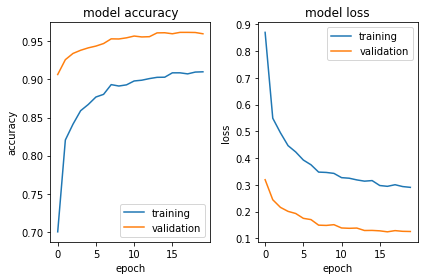

313/313 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy: 0.9498
Test loss: 0.16
Test accuracy: 0.95
Activation: sigmoid  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


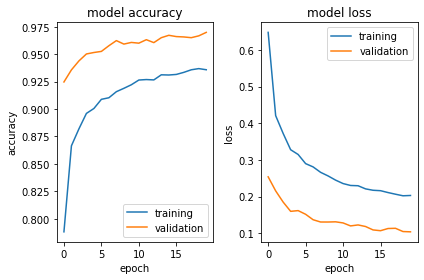

313/313 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9626
Test loss: 0.121
Test accuracy: 0.963
Activation: sigmoid  | Optimizer: nadam  | Drop out: 0.1  | Loss: categorical_crossentropy


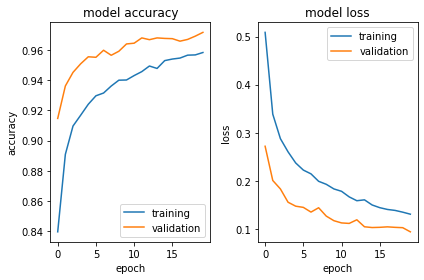

313/313 [==============================] - 1s 2ms/step - loss: 0.1101 - accuracy: 0.9634
Test loss: 0.11
Test accuracy: 0.963
Activation: elu  | Optimizer: nadam  | Drop out: 0.5  | Loss: categorical_crossentropy


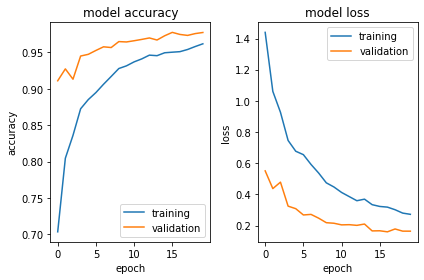

313/313 [==============================] - 1s 2ms/step - loss: 0.2032 - accuracy: 0.9709
Test loss: 0.203
Test accuracy: 0.971
Activation: elu  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


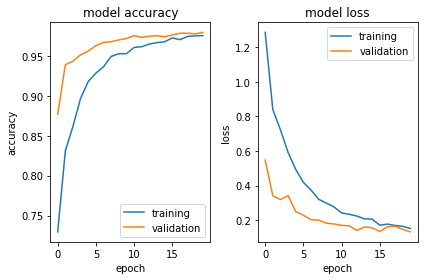

313/313 [==============================] - 1s 2ms/step - loss: 0.1532 - accuracy: 0.9779
Test loss: 0.153
Test accuracy: 0.978
Activation: elu  | Optimizer: nadam  | Drop out: 0.1  | Loss: categorical_crossentropy


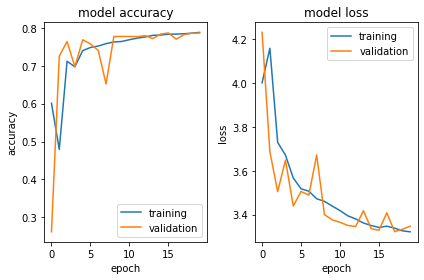

313/313 [==============================] - 1s 2ms/step - loss: 3.3921 - accuracy: 0.7824
Test loss: 3.39
Test accuracy: 0.782
Activation: selu  | Optimizer: nadam  | Drop out: 0.5  | Loss: categorical_crossentropy


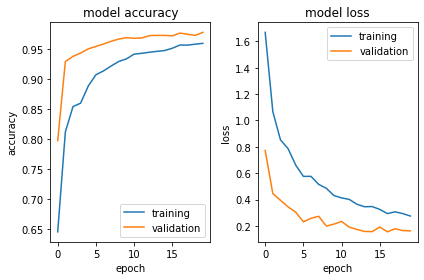

313/313 [==============================] - 1s 2ms/step - loss: 0.2179 - accuracy: 0.9726
Test loss: 0.218
Test accuracy: 0.973
Activation: selu  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


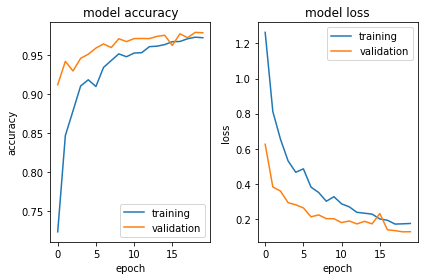

313/313 [==============================] - 1s 2ms/step - loss: 0.1721 - accuracy: 0.9749
Test loss: 0.172
Test accuracy: 0.975
Activation: selu  | Optimizer: nadam  | Drop out: 0.1  | Loss: categorical_crossentropy


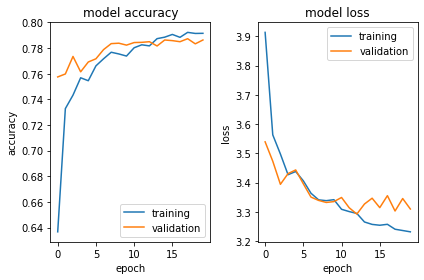

313/313 [==============================] - 1s 2ms/step - loss: 3.3361 - accuracy: 0.7845
Test loss: 3.34
Test accuracy: 0.785


In [37]:
epochs = 20
batch_size = 32
validation_split = 0.1

activations = ['sigmoid','elu','selu']
optimizers = ['nadam']
dropout_rates = [.5,.3,.1]
losses = ['categorical_crossentropy']

for activation in activations:
  for dropout_rate in dropout_rates:
    for optimizer in optimizers:
      for loss in losses:
        model_3 = get_model_3_layered(activation, dropout_rate)
        model_3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        print("Activation:", activation, " | Optimizer:", optimizer, " | Drop out:", dropout_rate, " | Loss:", loss)
        history = model_3.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
        plot_training_history(history, model_3)

#### Level 3 - Observations

From the above data we observe that we get very good accuracies roughly at 0.3 dropout rate. 0.8 dropout rate was also considered but omitted here as the computation time had increased significantly. The accuracies with 0.8 drop out rate were not very considerable.

* Dropout rate = 0.5
  * sigmoid = 95%+
  * elu = 96%+
  * selu = 96%+
* Dropout rate = 0.3
  * sigmoid = 97%+
  * elu = 97%+
  * selu = 78%+
* Dropout rate = 0.1
  * sigmoid = 97%+
  * elu = 97%+
  * selu = 78%+

We thus continue our analysis fixing a dropout rate of 0.3 and discard the rest.


#### Level 4 - Variations in Loss Functions

We now consider the variation of the loss functions and measure it's accuracy against elu, sigmoid and selu activation functions at this level. The remaining parameters remain unchanged and fixed as per the calculations in the levels above.

Activation: sigmoid  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


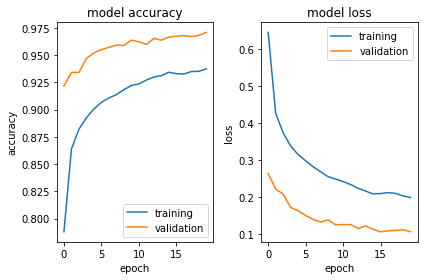

313/313 [==============================] - 1s 2ms/step - loss: 0.1254 - accuracy: 0.9599
Test loss: 0.125
Test accuracy: 0.96
Activation: sigmoid  | Optimizer: nadam  | Drop out: 0.3  | Loss: binary_crossentropy


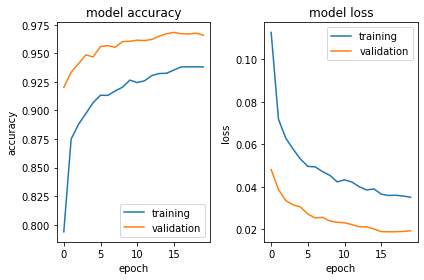

313/313 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.9601
Test loss: 0.0234
Test accuracy: 0.96
Activation: elu  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


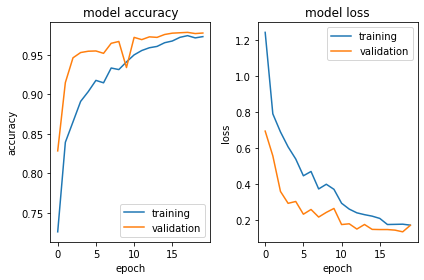

313/313 [==============================] - 1s 2ms/step - loss: 0.1826 - accuracy: 0.9744
Test loss: 0.183
Test accuracy: 0.974
Activation: elu  | Optimizer: nadam  | Drop out: 0.3  | Loss: binary_crossentropy


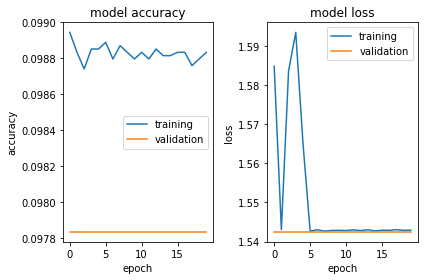

313/313 [==============================] - 1s 2ms/step - loss: 1.5425 - accuracy: 0.0980
Test loss: 1.54
Test accuracy: 0.098
Activation: selu  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


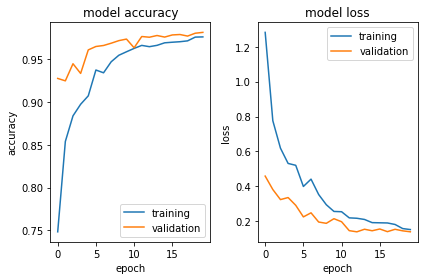

313/313 [==============================] - 1s 2ms/step - loss: 0.1597 - accuracy: 0.9792
Test loss: 0.16
Test accuracy: 0.979
Activation: selu  | Optimizer: nadam  | Drop out: 0.3  | Loss: binary_crossentropy


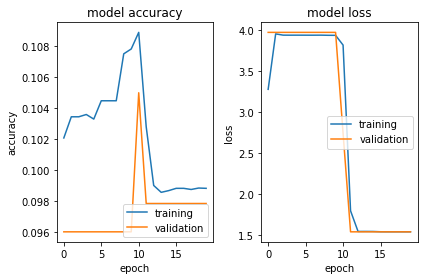

313/313 [==============================] - 1s 2ms/step - loss: 1.5425 - accuracy: 0.0980
Test loss: 1.54
Test accuracy: 0.098


In [39]:
epochs = 20
batch_size = 32
validation_split = 0.1

activations = ['sigmoid','elu','selu']
optimizers = ['nadam']
dropout_rates = [.3]
losses = ['categorical_crossentropy','binary_crossentropy']

for activation in activations:
  for dropout_rate in dropout_rates:
    for optimizer in optimizers:
      for loss in losses:
        model_4 = get_model_3_layered(activation, dropout_rate)
        model_4.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        print("Activation:", activation, " | Optimizer:", optimizer, " | Drop out:", dropout_rate, " | Loss:", loss)
        history = model_4.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
        plot_training_history(history, model_4)

#### Level 4 - Observations

From the above data we observe that we get very better accuracies with binary cross entropies for sigmoid and elu whereas we get better accuracy with categorical cross entropy for selu. We shall then move on to study the effect of early stopping with both the binary cross entropy cases.

* Loss Function = Categorical Cross Entropy
  * sigmoid = 95%+
  * elu = 97%+
  * selu = 97%+
* Loss Function = Binary Cross Entropy
  * sigmoid = 96%+
  * elu = 98%
  * selu = 9%

We now have quite a few models with accuracies more that 97%!

#### Level 5 - Application of Early Stopping

Here we consider the effect of early stopping on a few of our models. We consider our patience to be 10. The patience value defines the number of epochs to wait before early stop.

Note that we consider number of epochs to be 50 here instead of 20.

Activation: sigmoid  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


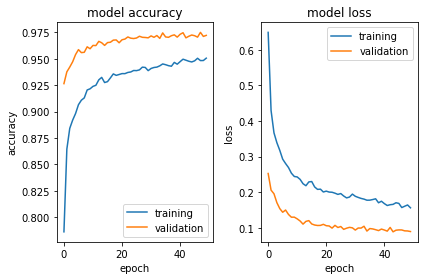

313/313 [==============================] - 1s 2ms/step - loss: 0.1002 - accuracy: 0.9694
Test loss: 0.1
Test accuracy: 0.969
Activation: elu  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


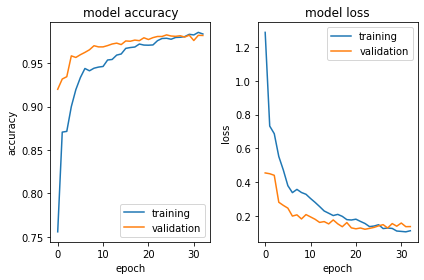

313/313 [==============================] - 1s 2ms/step - loss: 0.1553 - accuracy: 0.9797
Test loss: 0.155
Test accuracy: 0.98
Activation: selu  | Optimizer: nadam  | Drop out: 0.3  | Loss: categorical_crossentropy


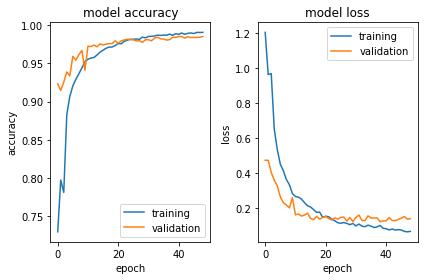

313/313 [==============================] - 1s 2ms/step - loss: 0.1421 - accuracy: 0.9830
Test loss: 0.142
Test accuracy: 0.983


In [54]:
epochs = 50
batch_size = 32
validation_split = 0.1

activations = ['sigmoid','elu','selu']
optimizers = ['nadam']
dropout_rates = [.3]
losses = ['categorical_crossentropy']
early_stopping = EarlyStopping(monitor='val_loss',patience=10)

for activation in activations:
  for dropout_rate in dropout_rates:
    for optimizer in optimizers:
      for loss in losses:
        model_5 = get_model_3_layered(activation, dropout_rate)
        model_5.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        print("Activation:", activation, " | Optimizer:", optimizer, " | Drop out:", dropout_rate, " | Loss:", loss)
        history = model_5.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split, callbacks=[early_stopping])
        plot_training_history(history, model_5)

#### Level 5 - Observations

Thus seeing the graphs of our funtions on multiple runs, early effect doesn't seem very consistent for such a small network architecture. elu activation does however reach it's accuracy early on. Not every function had to run 50 epochs. In the last run, the results of early effect were as follows:

* sigmoid
  * Number of epochs = 40
  * Accuracy = 96%+
* elu
  * Number of epochs = 30+
  * Accuracy = 97%+
* selu
  * Number of epochs = 40
  * Accuracy = 98%+

### 5 Layer Network

Consider the 5 layer network architecture as follows

In [48]:
def get_model_5_layered(activation, dropout_rate):
  model = Sequential()
  model.add(Dense(units = 512, activation = activation, input_shape = (mnist_image_size,)))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(units = 256, activation = activation))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(units = 128, activation = activation))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(units = 64, activation = activation))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(units = 32, activation = activation))
  model.add(Dropout(rate=dropout_rate))
  model.add(Dense(units = mnist_num_classes, activation = activation))
  return model

We have performed an extensive analysis of all parameters on the three layered network. Thus, here we select one of the  optimal 3 layered models observed and do an analyis of the effects of network structure below. We shall further consider the effects of early stopping on this 5 layer model.

Here's a description of the five layer network architecture:

* Activation Functions: elu

* Dropout Rates: 0.3

* Optimizer Functions: nadam

* Loss Functions: categorical_crossentropy

* Network Architecture: 5 layer



#### 5 Layer Network w/o Early Stopping

Activation: elu  | Optimizer: adam  | Drop out: 0.1  | Loss: categorical_crossentropy


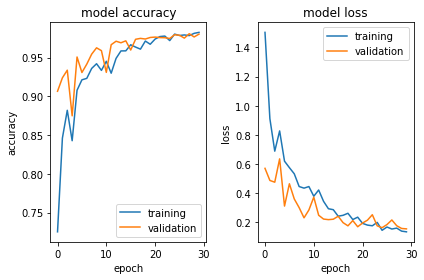

313/313 [==============================] - 1s 2ms/step - loss: 0.1826 - accuracy: 0.9792
Test loss: 0.183
Test accuracy: 0.979
Activation: elu  | Optimizer: adam  | Drop out: 0.3  | Loss: categorical_crossentropy


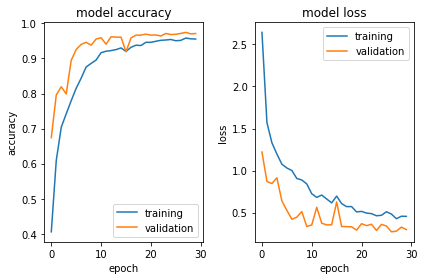

313/313 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.9647
Test loss: 0.371
Test accuracy: 0.965
Activation: elu  | Optimizer: adam  | Drop out: 0.5  | Loss: categorical_crossentropy


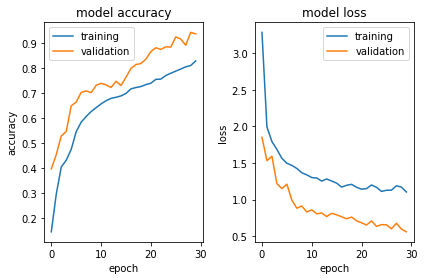

313/313 [==============================] - 1s 2ms/step - loss: 0.6367 - accuracy: 0.9318
Test loss: 0.637
Test accuracy: 0.932


In [55]:
epochs = 30
batch_size = 32
validation_split = 0.1

activations = ['elu']
optimizers = ['adam']
dropout_rates = [.1,.3,.5]
losses = ['categorical_crossentropy']

for activation in activations:
  for dropout_rate in dropout_rates:
    for optimizer in optimizers:
      for loss in losses:
        model_6 = get_model_5_layered(activation, dropout_rate)
        model_6.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        print("Activation:", activation, " | Optimizer:", optimizer, " | Drop out:", dropout_rate, " | Loss:", loss)
        history = model_6.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
        plot_training_history(history, model_6)

#### 5 Layer Network w/ Earlly Stopping

Activation: elu  | Optimizer: adam  | Drop out: 0.1  | Loss: categorical_crossentropy


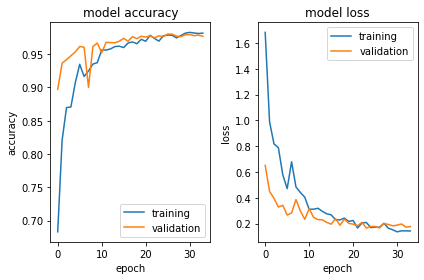

313/313 [==============================] - 1s 2ms/step - loss: 0.2128 - accuracy: 0.9755
Test loss: 0.213
Test accuracy: 0.975
Activation: elu  | Optimizer: adam  | Drop out: 0.3  | Loss: categorical_crossentropy


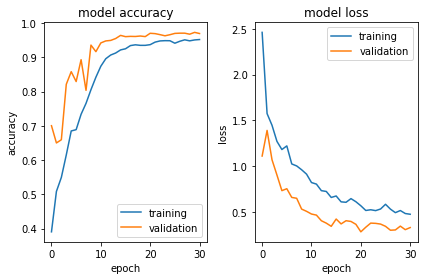

313/313 [==============================] - 1s 2ms/step - loss: 0.3869 - accuracy: 0.9655
Test loss: 0.387
Test accuracy: 0.965
Activation: elu  | Optimizer: adam  | Drop out: 0.5  | Loss: categorical_crossentropy


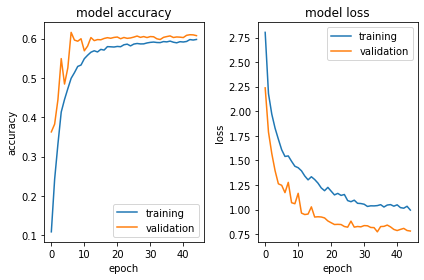

313/313 [==============================] - 1s 2ms/step - loss: 0.8561 - accuracy: 0.5997
Test loss: 0.856
Test accuracy: 0.6


In [57]:
epochs = 50
batch_size = 32
validation_split = 0.1

activations = ['elu']
optimizers = ['adam']
dropout_rates = [.1,.3,.5]
losses = ['categorical_crossentropy']
early_stopping = EarlyStopping(monitor='val_loss',patience=10)

for activation in activations:
  for dropout_rate in dropout_rates:
    for optimizer in optimizers:
      for loss in losses:
        model_7 = get_model_5_layered(activation, dropout_rate)
        model_7.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        print("Activation:", activation, " | Optimizer:", optimizer, " | Drop out:", dropout_rate, " | Loss:", loss)
        history = model_7.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split,callbacks=[early_stopping])
        plot_training_history(history, model_7)

#### Observation - Comparison of Network Architectures

We observe here that the epochs in case 1 (dropout =0.1) and 2 (dropout = 0.3) stop way before their 50 mark thus optimizing computation time. Thus in larger neural networks we did find stopping to be effective.

Below is the observed data with and without early stopping:

* W/o early stopping
  * dropout = 0.1 | accuracy = 97%+ | epoch = 50
  * dropout = 0.3 | accuracy = 96%+ | epoch = 50
  * dropout = 0.5 | accuracy = 93%+ | epoch = 50

* W/ early stopping
  * dropout = 0.1 | accuracy = 97%+ | epoch = 30+
  * dropout = 0.3 | accuracy = 96%+ | epoch = 30+
  * dropout = 0.5 | accuracy = 59%+ | epoch = 40+

### Overall Conclusion

We thus complete our analysis. Many models achieved an accuracy of 97%+ some even touching 98%. We find that for the MNIST data set the following parameters are the most efficient:

* Activation Functions: sigmoid, elu, selu

* Dropout Rates: 0.1, 0.3

* Optimizer Functions: adam, nadam

* Loss Functions: categorical_crossentropy

We also note that the efficiency of our model increases with early stopping but only for larger network architectures